In [1]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('E-commerce_Project.csv', encoding='unicode_escape')

# Display the first 5 rows of the DataFrame
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
# Remove rows with missing CustomerID, as they are not useful for customer analysis.
df.dropna(subset=['CustomerID'], inplace=True)

# Fill missing Description values with a placeholder.
df['Description'].fillna('Unknown', inplace=True)

# Convert the InvoiceDate column to a datetime format.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

C:\Users\Resh Mawuena\AppData\Local\Temp\ipykernel_7480\3946179955.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('Unknown', inplace=True)


ValueError: time data "13/12/2010 9:02" doesn't match format "%m/%d/%Y %H:%M", at position 927. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [5]:
# Remove rows with missing CustomerID, as they are not useful for customer analysis.
df = df.dropna(subset=['CustomerID'])

# Fill missing Description values with a placeholder.
df['Description'] = df['Description'].fillna('Unknown')

# Convert the InvoiceDate column to a datetime format.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)

In [6]:
# Remove rows with missing CustomerID, as they are not useful for customer analysis.
df = df.dropna(subset=['CustomerID'])

# Fill missing Description values with a placeholder.
df['Description'] = df['Description'].fillna('Unknown')

# Convert the InvoiceDate column to a datetime format.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [8]:
# Convert CustomerID to a string type
df['CustomerID'] = df['CustomerID'].astype(str)

# Check the data types again to confirm the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [9]:
# Check for negative values in the 'Quantity' column
print(f"Number of negative Quantity values: {(df['Quantity'] < 0).sum()}")

# Check for negative values in the 'UnitPrice' column
print(f"Number of negative UnitPrice values: {(df['UnitPrice'] < 0).sum()}")

Number of negative Quantity values: 8905
Number of negative UnitPrice values: 0


In [10]:
# Keep only the rows where 'Quantity' is greater than 0
df = df[df['Quantity'] > 0]

# Check the number of rows to confirm the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  object        
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


In [11]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('E-commerce_Project.csv', encoding='unicode_escape')

# Remove rows with negative quantities
df = df[df['Quantity'] > 0]

# Remove rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Fill missing Description values
df['Description'] = df['Description'].fillna('Unknown')

# Convert the InvoiceDate column to a datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)

# Convert CustomerID to a string type
df['CustomerID'] = df['CustomerID'].astype(str)

# Create a new column for TotalSales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Display the first 5 rows to see the new column
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [12]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('E-commerce_Project.csv', encoding='unicode_escape')

# Remove rows with negative quantities
df = df[df['Quantity'] > 0]

# Remove rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Fill missing Description values
df['Description'] = df['Description'].fillna('Unknown')

# Convert the InvoiceDate column to a datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)

# Convert CustomerID to a string type
df['CustomerID'] = df['CustomerID'].astype(str)

# Create a new column for TotalSales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Display the first 5 rows to see the new column
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('E-commerce_Project.csv', encoding='unicode_escape')

# Remove rows with negative quantities
df = df[df['Quantity'] > 0]

# Remove rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Fill missing Description values
df['Description'] = df['Description'].fillna('Unknown')

# Convert the InvoiceDate column to a datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)

# Convert CustomerID to a string type
df['CustomerID'] = df['CustomerID'].astype(str)

# Create a new column for TotalSales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Display the first 5 rows to see the new column
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [14]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('E-commerce_Project.csv', encoding='unicode_escape')

# Remove rows with negative quantities
df = df[df['Quantity'] > 0]

# Remove rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Fill missing Description values
df['Description'] = df['Description'].fillna('Unknown')

# Convert the InvoiceDate column to a datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)

# Convert CustomerID to a string type
df['CustomerID'] = df['CustomerID'].astype(str)

# Create a new column for TotalSales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Display the first 5 rows to see the new column
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('E-commerce_Project.csv', encoding='unicode_escape')

# Remove rows with negative quantities
df = df[df['Quantity'] > 0]

# Remove rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Fill missing Description values
df['Description'] = df['Description'].fillna('Unknown')

# Convert the InvoiceDate column to a datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)

# Convert CustomerID to a string type
df['CustomerID'] = df['CustomerID'].astype(str)

# Create a new column for TotalSales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Display the first 5 rows to see the new column
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
# Group by country and sum the total sales, then sort in descending order
top_10_countries = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Display the result
print("Top 10 Countries by Total Sales:\n")
print(top_10_countries)

Top 10 Countries by Total Sales:

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: TotalSales, dtype: float64


In [17]:
# Group the data by 'Description' and sum the 'Quantity' for each product
top_10_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Display the results
print("Top 10 Best-Selling Products by Quantity:\n")
print(top_10_products)

Top 10 Best-Selling Products by Quantity:

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


In [18]:
# Group by Description and sum the TotalSales for each product
top_10_revenue_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Display the results
print("Top 10 Products by Total Sales:\n")
print(top_10_revenue_products)

Top 10 Products by Total Sales:

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalSales, dtype: float64


In [19]:
# Count the number of unique customer IDs
unique_customers = df['CustomerID'].nunique()

# Print the result
print(f"Total number of unique customers: {unique_customers}")

Total number of unique customers: 4339


In [20]:
# Group by 'CustomerID' and count the number of unique invoices for each customer
customer_frequency = df.groupby('CustomerID')['InvoiceNo'].count().sort_values(ascending=False).head(10)

# Display the results
print("Top 10 Most Frequent Customers:\n")
print(customer_frequency)

Top 10 Most Frequent Customers:

CustomerID
17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
15311.0    2379
14646.0    2080
13089.0    1818
13263.0    1677
14298.0    1637
Name: InvoiceNo, dtype: int64


In [21]:
# Group by 'CustomerID' and sum the 'TotalSales' for each customer
customer_monetary = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Display the results
print("Top 10 Most Valuable Customers:\n")
print(customer_monetary)

Top 10 Most Valuable Customers:

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: TotalSales, dtype: float64


In [22]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

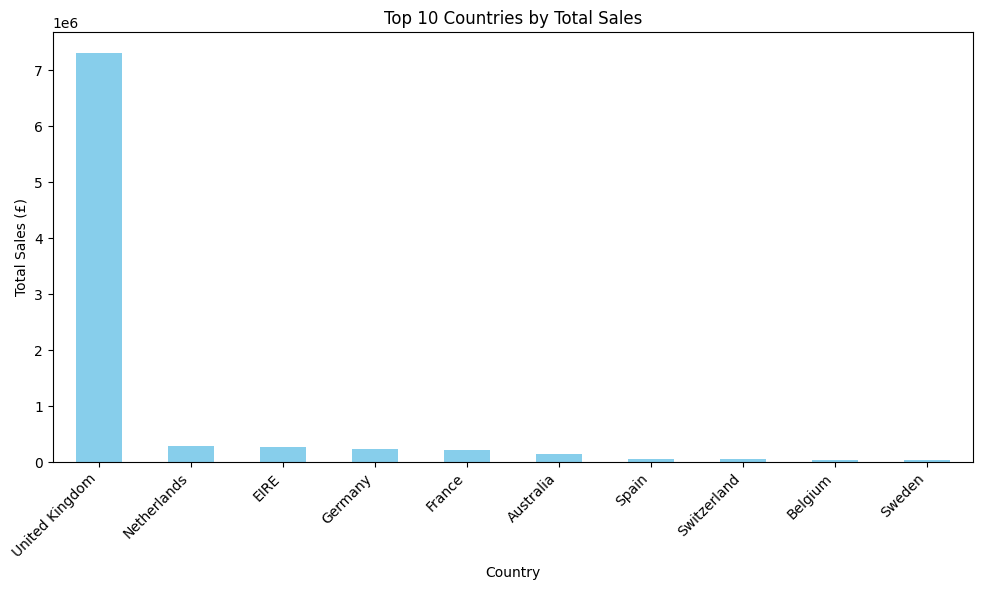

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Re-run all data preparation steps to create the DataFrame
df = pd.read_csv('E-commerce_Project.csv', encoding='unicode_escape')
df = df[df['Quantity'] > 0]
df = df.dropna(subset=['CustomerID'])
df['Description'] = df['Description'].fillna('Unknown')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)
df['CustomerID'] = df['CustomerID'].astype(str)
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Re-run the top 10 countries analysis to ensure the variable is defined
top_10_countries = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [2]:
# Set 'InvoiceDate' as the index for time-series analysis
df.set_index('InvoiceDate', inplace=True)

# Resample the data to show total sales per month
monthly_sales = df['TotalSales'].resample('M').sum()

# Display the first few rows of the monthly sales data
print("Monthly Sales Data:")
print(monthly_sales.head())

Monthly Sales Data:
InvoiceDate
2010-12-31    572713.890
2011-01-31    569445.040
2011-02-28    447137.350
2011-03-31    595500.760
2011-04-30    469200.361
Freq: ME, Name: TotalSales, dtype: float64


C:\Users\Resh Mawuena\AppData\Local\Temp\ipykernel_6260\757005103.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['TotalSales'].resample('M').sum()


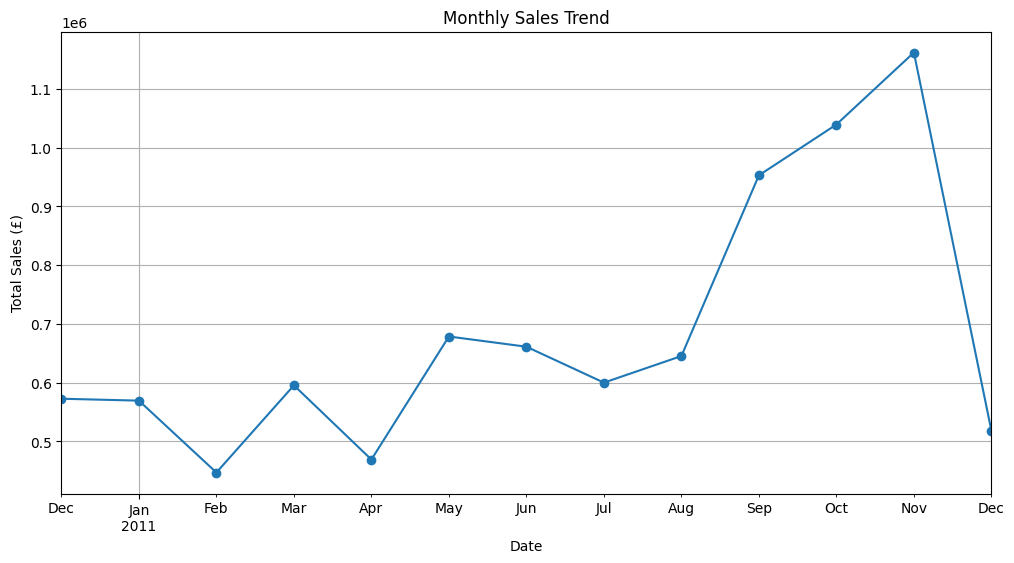

In [3]:
# Import matplotlib library for plotting
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales (£)')
plt.grid(True)
plt.show()

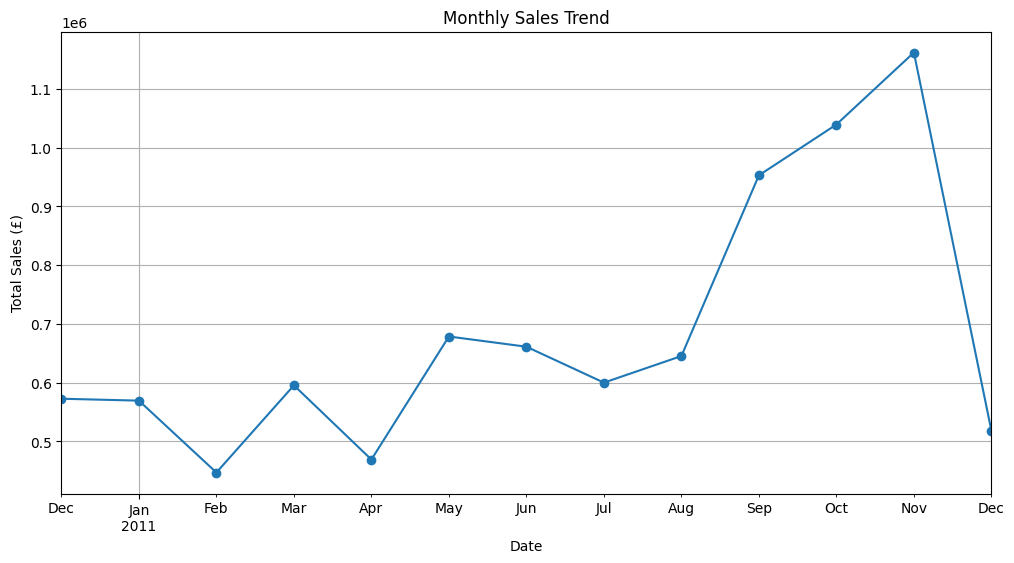

In [4]:
# Import matplotlib library for plotting
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales (£)')
plt.grid(True)
plt.show()

In [5]:
# Find the most recent date in the dataset to use as the reference date
last_purchase_date = df.index.max()

# Calculate Recency: days since each customer's last purchase
recency = (last_purchase_date - df.groupby('CustomerID').index.max()).dt.days

# Display the top 5 customers by recency
print("Recency (Days Since Last Purchase):")
print(recency.head())

AttributeError: 'DataFrameGroupBy' object has no attribute 'index'

In [6]:
# Re-run step 1 with the corrected code
# Find the most recent date in the dataset to use as the reference date
last_purchase_date = df.index.max()

# Calculate Recency: days since each customer's last purchase
recency = (last_purchase_date - df.groupby('CustomerID').apply(lambda x: x.index.max())).dt.days

# Calculate Frequency (number of orders)
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Calculate Monetary value (total sales)
monetary = df.groupby('CustomerID')['TotalSales'].sum()

# Combine Recency, Frequency, and Monetary data into a new DataFrame
rfm_df = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

# Display the first 5 rows of the new RFM DataFrame
print("\nRFM DataFrame:")
print(rfm_df.head())


RFM DataFrame:
            Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1  77183.60
12347.0           1          7   4310.00
12348.0          74          4   1797.24
12349.0          18          1   1757.55
12350.0         309          1    334.40


C:\Users\Resh Mawuena\AppData\Local\Temp\ipykernel_6260\2971683186.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recency = (last_purchase_date - df.groupby('CustomerID').apply(lambda x: x.index.max())).dt.days


In [7]:
# Create quartiles for Recency, Frequency, and Monetary
rfm_df['R_Score'] = rfm_df['Recency'].rank(method='first', ascending=False).astype(int)
rfm_df['F_Score'] = rfm_df['Frequency'].rank(method='first', ascending=True).astype(int)
rfm_df['M_Score'] = rfm_df['Monetary'].rank(method='first', ascending=True).astype(int)

# Normalize the scores to be between 1 and 4
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 4, labels=[1, 2, 3, 4], duplicates='drop')
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')

# Display the first 5 rows with the new scores
print("RFM Scores:")
print(rfm_df.head())

ValueError: Bin labels must be one fewer than the number of bin edges

In [8]:
# Create scores using the rank method, which is more robust to duplicate values

# For Recency, we want low values to have a high score, so we rank descending
rfm_df['R_Score'] = rfm_df['Recency'].rank(method='first', ascending=False)
rfm_df['R_Score'] = pd.qcut(rfm_df['R_Score'], 4, labels=[1, 2, 3, 4], duplicates='drop')

# For Frequency and Monetary, we want high values to have a high score, so we rank ascending
rfm_df['F_Score'] = rfm_df['Frequency'].rank(method='first', ascending=True)
rfm_df['F_Score'] = pd.qcut(rfm_df['F_Score'], 4, labels=[1, 2, 3, 4], duplicates='drop')

rfm_df['M_Score'] = rfm_df['Monetary'].rank(method='first', ascending=True)
rfm_df['M_Score'] = pd.qcut(rfm_df['M_Score'], 4, labels=[1, 2, 3, 4], duplicates='drop')

# Display the first 5 rows with the new scores
print("RFM Scores:")
print(rfm_df.head())

RFM Scores:
            Recency  Frequency  Monetary R_Score F_Score M_Score
CustomerID                                                      
12346.0         325          1  77183.60       1       1       4
12347.0           1          7   4310.00       4       4       4
12348.0          74          4   1797.24       2       3       4
12349.0          18          1   1757.55       3       1       4
12350.0         309          1    334.40       1       1       2


In [9]:
# Create a combined RFM score by concatenating R, F, and M scores
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Define customer segments based on the RFM Score
def rfm_segment(score):
    if score == '444':
        return 'Champions'  # Best customers, bought recently, often, and spent the most
    elif score in ['443', '434', '344', '334', '343', '433']:
        return 'Loyal Customers' # High frequency, high value, but may need attention
    elif score in ['422', '322', '222', '221', '212', '221']:
        return 'Promising' # Recently purchased, but low frequency and monetary value
    elif score in ['411', '311']:
        return 'New Customers' # Recently purchased, low frequency and monetary value
    elif score in ['111']:
        return 'Lost Customers' # Low recency, frequency, and monetary value
    else:
        return 'Other'

# Apply the segmentation function to create a new column
rfm_df['Customer_Segment'] = rfm_df['RFM_Score'].apply(rfm_segment)

# Display the first 5 rows with the new RFM Score and Segment
print("Final RFM DataFrame with Segments:")
print(rfm_df.head())

# Display a count of customers in each segment
print("\nNumber of Customers in Each Segment:")
print(rfm_df['Customer_Segment'].value_counts())

Final RFM DataFrame with Segments:
            Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score  \
CustomerID                                                                   
12346.0         325          1  77183.60       1       1       4       114   
12347.0           1          7   4310.00       4       4       4       444   
12348.0          74          4   1797.24       2       3       4       234   
12349.0          18          1   1757.55       3       1       4       314   
12350.0         309          1    334.40       1       1       2       112   

           Customer_Segment  
CustomerID                   
12346.0               Other  
12347.0           Champions  
12348.0               Other  
12349.0               Other  
12350.0               Other  

Number of Customers in Each Segment:
Customer_Segment
Other              2276
Loyal Customers     677
Champions           474
Promising           466
Lost Customers      303
New Customers       143
Name: cou

C:\Users\Resh Mawuena\AppData\Local\Temp\ipykernel_6260\3303213419.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recency = (last_purchase_date - df.groupby('CustomerID').apply(lambda x: x.index.max())).dt.days


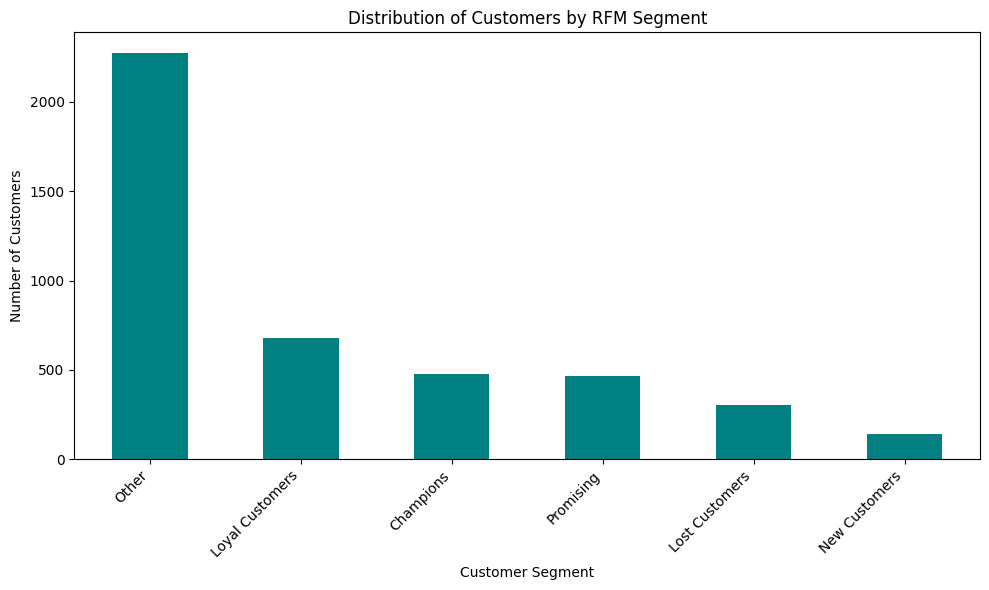

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Re-run all data preparation steps to create the DataFrame
df = pd.read_csv('E-commerce_Project.csv', encoding='unicode_escape')
df = df[df['Quantity'] > 0]
df = df.dropna(subset=['CustomerID'])
df['Description'] = df['Description'].fillna('Unknown')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)
df['CustomerID'] = df['CustomerID'].astype(str)
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Re-run the RFM analysis to create the segments
df.set_index('InvoiceDate', inplace=True)
last_purchase_date = df.index.max()
recency = (last_purchase_date - df.groupby('CustomerID').apply(lambda x: x.index.max())).dt.days
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()
monetary = df.groupby('CustomerID')['TotalSales'].sum()

rfm_df = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

rfm_df['R_Score'] = rfm_df['Recency'].rank(method='first', ascending=False)
rfm_df['R_Score'] = pd.qcut(rfm_df['R_Score'], 4, labels=[1, 2, 3, 4], duplicates='drop')
rfm_df['F_Score'] = rfm_df['Frequency'].rank(method='first', ascending=True)
rfm_df['F_Score'] = pd.qcut(rfm_df['F_Score'], 4, labels=[1, 2, 3, 4], duplicates='drop')
rfm_df['M_Score'] = rfm_df['Monetary'].rank(method='first', ascending=True)
rfm_df['M_Score'] = pd.qcut(rfm_df['M_Score'], 4, labels=[1, 2, 3, 4], duplicates='drop')

rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

def rfm_segment(score):
    if score == '444':
        return 'Champions'
    elif score in ['443', '434', '344', '334', '343', '433']:
        return 'Loyal Customers'
    elif score in ['422', '322', '222', '221', '212', '221']:
        return 'Promising'
    elif score in ['411', '311']:
        return 'New Customers'
    elif score in ['111']:
        return 'Lost Customers'
    else:
        return 'Other'

rfm_df['Customer_Segment'] = rfm_df['RFM_Score'].apply(rfm_segment)

# Now, create the bar chart of customer segments
segment_counts = rfm_df['Customer_Segment'].value_counts()

plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color='teal')
plt.title('Distribution of Customers by RFM Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()